In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
advertising_file_path = "Documents/GitHub/advertising/advertising.csv"

In [4]:
advertising = pd.read_csv(advertising_file_path)
advertising.head

<bound method NDFrame.head of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

In [5]:
advertising.info

<bound method DataFrame.info of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

In [6]:
advertising

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [7]:
advertising.shape
import seaborn as sns

,Sales,variable,value
0,22.1,TV,230.1
1,10.4,TV,44.5
2,12.0,TV,17.2
3,16.5,TV,151.5
4,17.9,TV,180.8
...,...,...,...
595,7.6,Newspaper,13.8
596,14.0,Newspaper,8.1
597,14.8,Newspaper,6.4
598,25.5,Newspaper,66.2


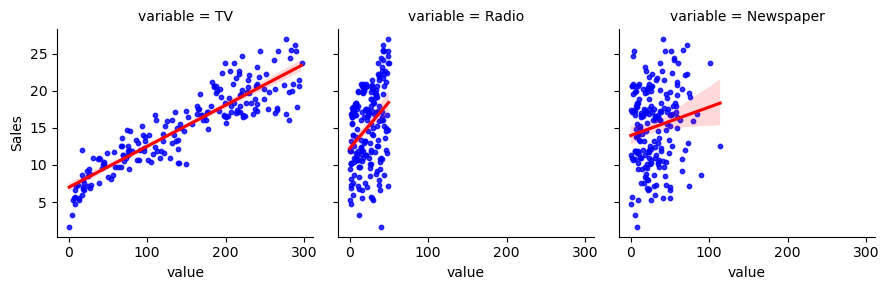

In [8]:
advertising_grid=pd.melt(advertising,id_vars="Sales", value_vars=["TV","Radio","Newspaper"])
g= sns.FacetGrid(advertising_grid,col="variable")
g.map(sns.regplot,"value","Sales",ci=95,scatter_kws={"color":"blue",'s':10},
      line_kws={"color":"red"});
advertising_grid

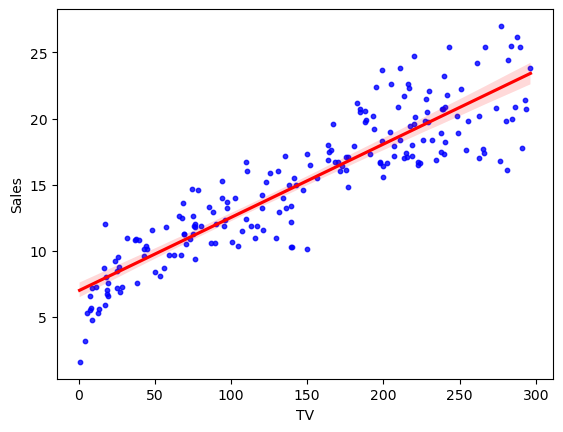

In [9]:
sns.regplot(data=advertising, x="TV", y="Sales",ci=95,
            scatter_kws={"color":"blue","s":10},
            line_kws={"color":"red"});

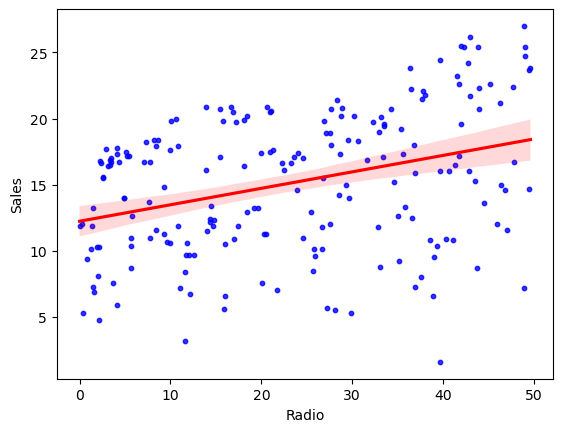

In [10]:
sns.regplot(data=advertising, x="Radio", y="Sales",ci=95,
            scatter_kws={"color":"blue","s":10},
            line_kws={"color":"red"});

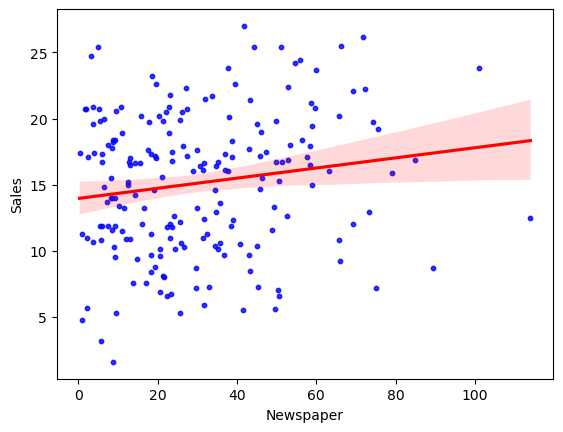

In [11]:
sns.regplot(data=advertising, x="Newspaper", y="Sales",ci=95,
            scatter_kws={"color":"blue","s":10},
            line_kws={"color":"red"});

In [12]:
beta_0=6.975

In [13]:
beta_1=0.055

mean_y=advertising.Sales.mean()

In [14]:
mean_y

15.130500000000001

In [15]:
tss_i=advertising.Sales.apply(lambda yi: (yi-mean_y)**2)
tss=tss_i.sum()
tss

y_hat_i=beta_0+beta_1*advertising.TV
y_hat_i

i_count=advertising.shape[0]
rss_i=[(advertising.Sales[i]-y_hat_i[i])**2 for i in range(i_count)]

rss=sum(rss_i)
rss

r2=(tss-rss)/tss

print("R2: ", np.round(r2,3))

R2:  0.812


In [18]:
import scipy as sci
import statsmodels.api as sm

In [20]:
X_t=np.array(advertising.TV,ndmin=2)
X=np.transpose(X_t)
y=advertising.Sales

X=sm.add_constant(X)

model=sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     856.2
Date:                Sun, 30 Mar 2025   Prob (F-statistic):           7.93e-74
Time:                        20:33:42   Log-Likelihood:                -448.99
No. Observations:                 200   AIC:                             902.0
Df Residuals:                     198   BIC:                             908.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9748      0.323     21.624      0.0